In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
# read the ames housing dataset
df = pd.read_csv('AmesHousing.csv')

c:\Users\Max\Documents\MSc\25_discover-projects\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Max\Documents\MSc\25_discover-projects\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


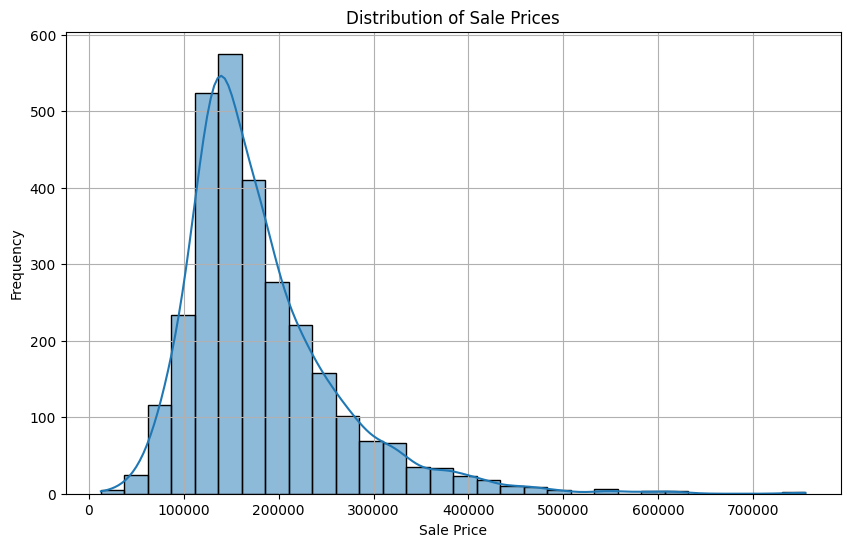

In [4]:
# simple visualization of the distribution of sale prices
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], bins=30, kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [5]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


c:\Users\Max\Documents\MSc\25_discover-projects\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Max\Documents\MSc\25_discover-projects\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Max\Documents\MSc\25_discover-projects\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


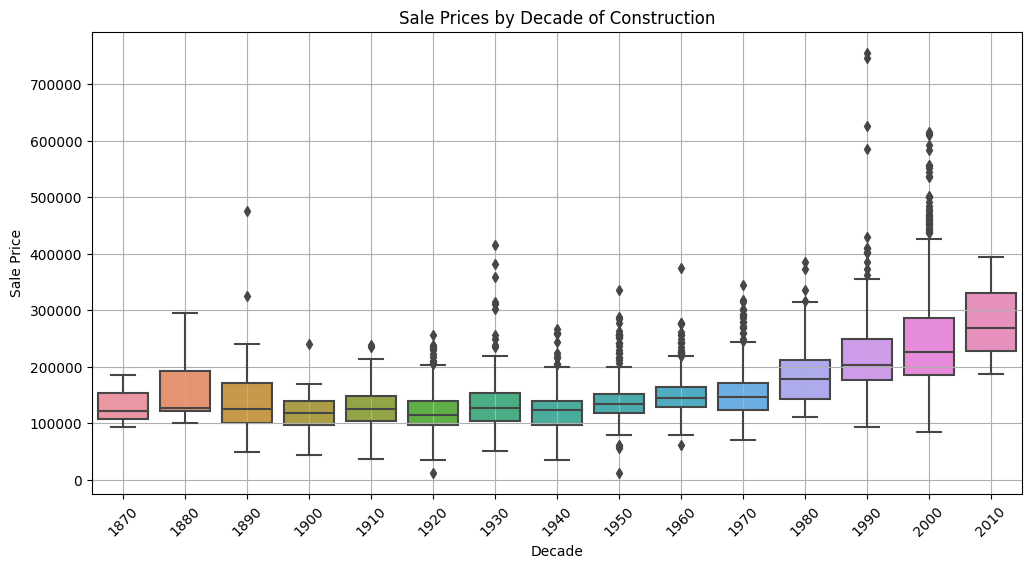

In [10]:
# distribution of sale prices versus year built grouped by decade
df['Decade'] = (df['Year Built'] // 10) * 10
plt.figure(figsize=(12, 6))
sns.boxplot(x='Decade', y='SalePrice', data=df)
plt.title('Sale Prices by Decade of Construction')
plt.xlabel('Decade')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

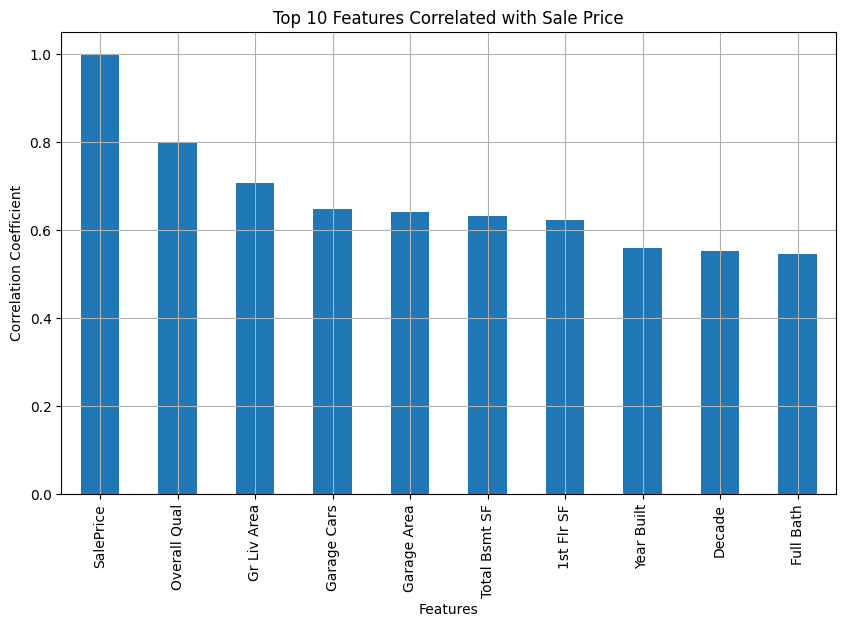

In [23]:
# only use numerical features
numeric_features = df.select_dtypes(include=[np.number])
# we want to find what numeric features are most correlated only with sale price
correlation_matrix = numeric_features.corr()
sale_price_correlation = correlation_matrix['SalePrice'].sort_values(ascending=False)
# display the top 10 features most correlated with sale price
top_features = sale_price_correlation.head(10)
plt.figure(figsize=(10, 6))
top_features.plot(kind='bar')
plt.title('Top 10 Features Correlated with Sale Price')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.show()

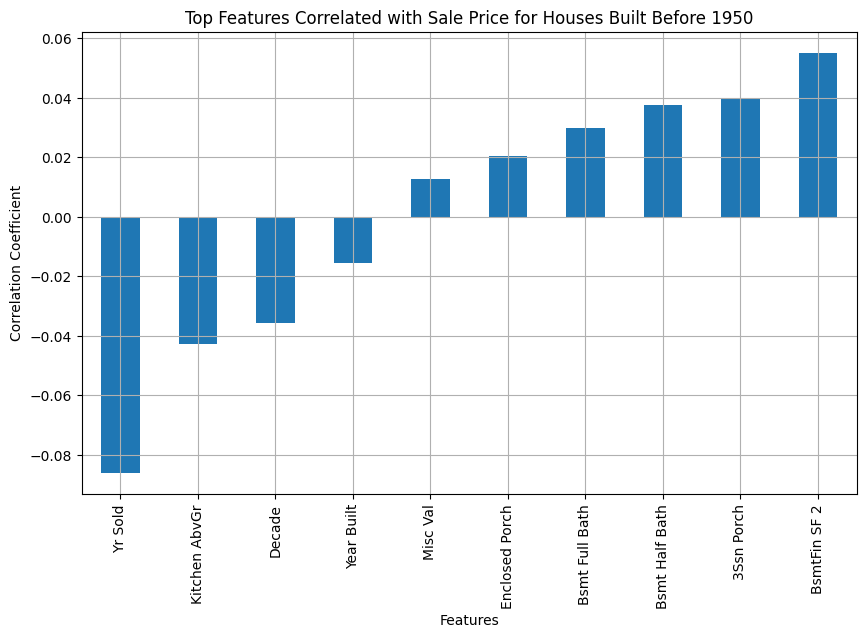

In [28]:
# explain what makes older houses more expensive
# older houses tend to have more character, larger lots, and are often located in more desirable
# neighborhoods. They may also have historical significance, which can drive up their value.
# Additionally, older houses may have been built with higher quality materials and craftsmanship,
# which can contribute to their higher prices. However, they may also require more maintenance and
# renovations, which can be a consideration for potential buyers.

# show the features that makes older houses more expensive
older_houses = df[df['Year Built'] < 1950]
older_houses_features = older_houses.select_dtypes(include=[np.number])
older_houses_correlation = older_houses_features.corr()
older_houses_sale_price_correlation = older_houses_correlation['SalePrice'].sort_values()
older_houses_top_features = older_houses_sale_price_correlation.head(10)
plt.figure(figsize=(10, 6))
older_houses_top_features.plot(kind='bar')
plt.title('Top Features Correlated with Sale Price for Houses Built Before 1950')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.show()

In [ ]:
# our audience is house buyers
# these people are similar in their interests in the housing market aspects
# most likely some of them are not interested in the hard maths
# they might be somewhat familiar with basis graphs, but definitely not with advanced ones
# also, they will be excited to buy the houses, but not impatient becasue they want to make a good decision
# so we will use simple graphs, but we will explain them in detail
# while we might present the visualizations in a powerpoint presentation, they will most likely also want to look back when they are at home
# the descisions are very personal, and they will want to see multiple offerings or indicators in simple terms
# as this is a major financial decision, they will resist any offering that is not well explained or does not fit their needs exactly